In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
features=df.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


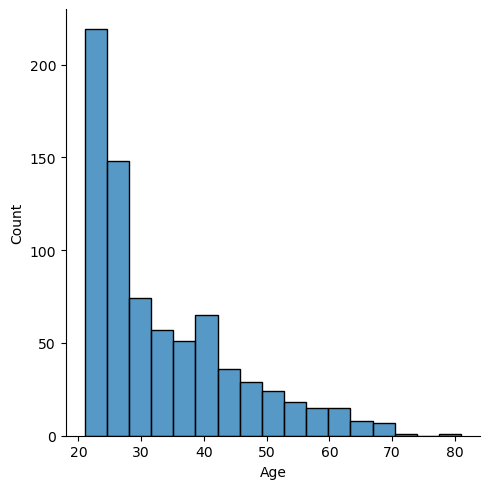

In [8]:
sns.displot(df["Age"])

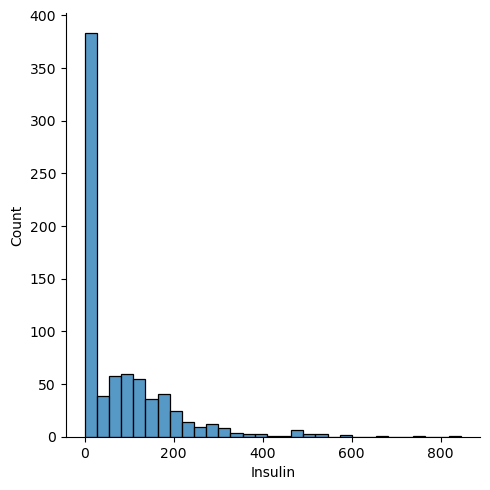

In [9]:
sns.displot(df["Insulin"])

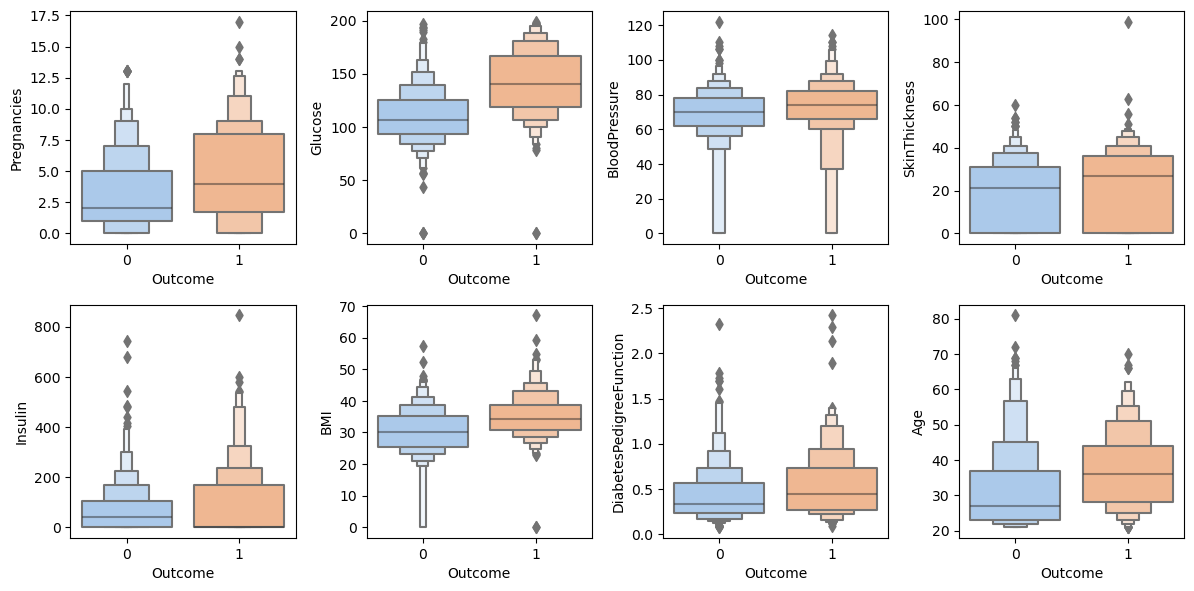

In [37]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxenplot(data=df, x='Outcome', y=feature, palette='pastel')
plt.tight_layout()
plt.show()

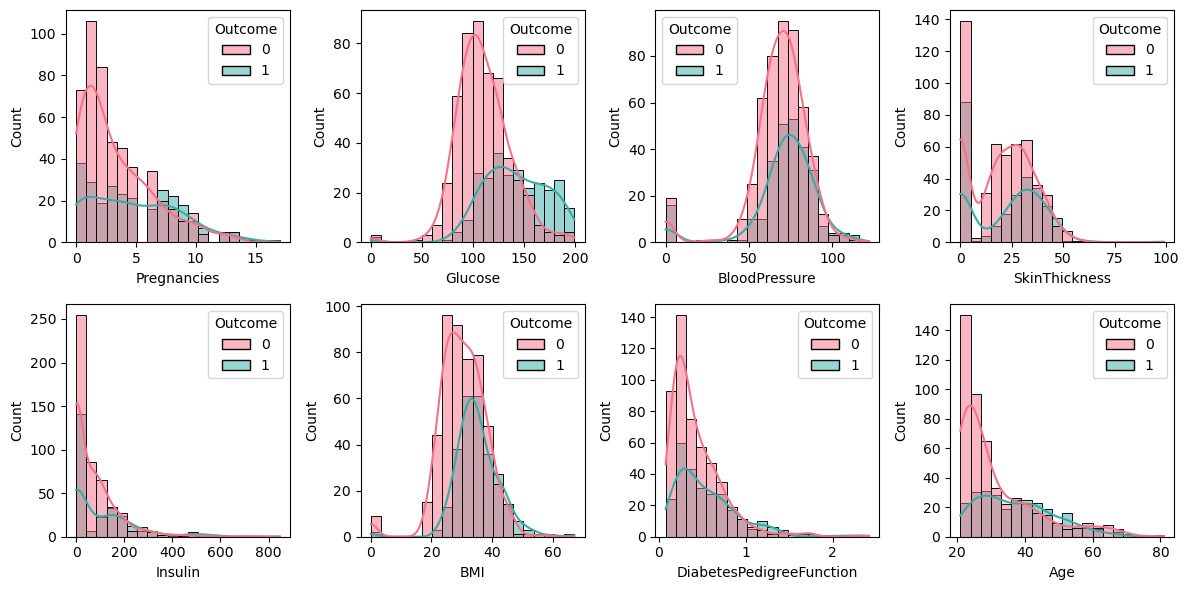

In [25]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, bins=20, palette='husl')
plt.tight_layout()
plt.show()

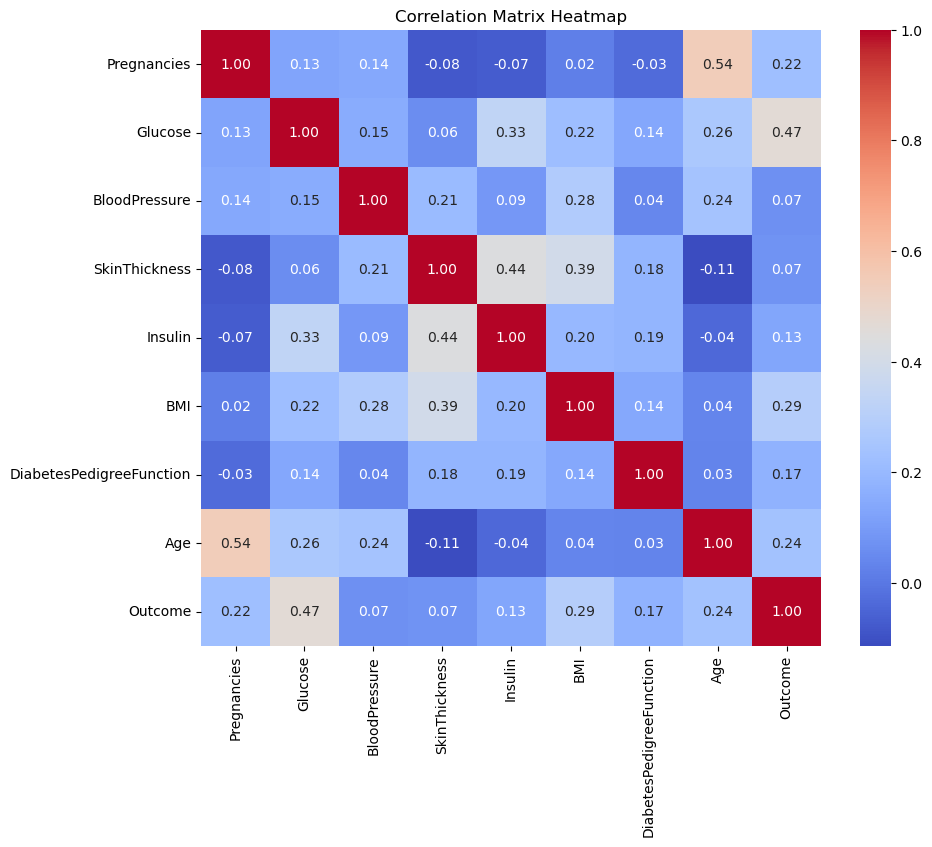

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

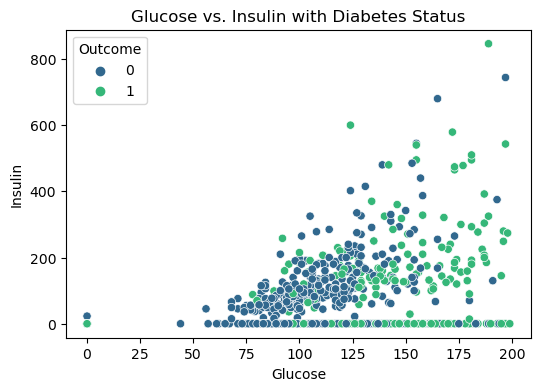

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Glucose', y='Insulin', hue='Outcome', palette='viridis')
plt.title('Glucose vs. Insulin with Diabetes Status')
plt.show()

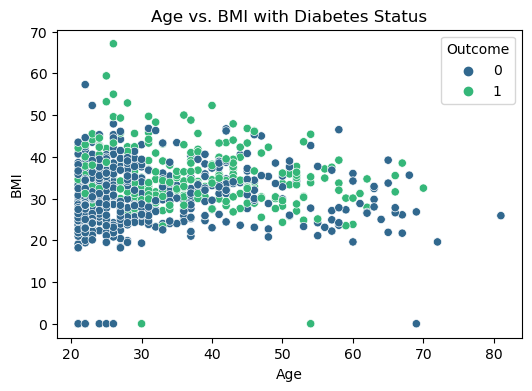

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', palette='viridis')
plt.title('Age vs. BMI with Diabetes Status')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
x = df.drop(columns = ['Outcome'])

y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       159
           1       0.69      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231



In [39]:
new_data = pd.DataFrame({
    'Pregnancies':[1],
    'Glucose': [106],
    'BloodPressure': [76],
    'SkinThickness': [0],
    'Insulin': [0],
    'BMI':[37.5],
    'DiabetesPedigreeFunction': [0.197],
    'Age':[36]
})
new_data1= pd.DataFrame({
    'Pregnancies':[3],
    'Glucose': [190],
    'BloodPressure': [92],
    'SkinThickness': [0],
    'Insulin': [30],
    'BMI':[44.0],
    'DiabetesPedigreeFunction': [0.278],
    'Age':[66]
})

# Scale the new data using the same StandardScaler
new_data_scaled = scaler.transform(new_data)
new_data_scaled1= scaler.transform(new_data1)

# Make predictions using the trained model
predictions = model.predict(new_data_scaled)
predictions1= model.predict(new_data_scaled1)

# Print the predictions
print(predictions)
print(predictions1)

[0]
[1]
